In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/countries of the world.csv')

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Ta thấy data frame có tổng cộng 227 dòng và 20 cột thuôc tính (0 - 19):


*  Có 3 cột kiểu số: 'Population', 'Area (sq. mi.)', và 'GDP ($ per capita)'.

*   Các cột còn lại (17 cột) đều là kiểu object, có thể chứa chuỗi ký tự hoặc dữ liệu văn bản.
*  Các cột 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', và 'Service' có dữ liệu thiếu.

chúng ta sẽ chuyển các cột kểu object qua thành float64 để dễ phân tích

In [ ]:
# Danh sách các cột cần chuyển đổi sang kiểu dữ liệu float64
columns_to_convert = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration',
                      'Infant mortality (per 1000 births)', 'Phones (per 1000)',
                      'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate',
                      'Agriculture', 'Industry', 'Service','Literacy (%)','Climate']

# Thay thế dấu phẩy bằng dấu chấm và chuyển đổi sang kiểu float
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: str(x).replace(',', '.')).astype(float)



# Chuyển đổi kiểu dữ liệu của các cột thành float64
df[columns_to_convert] = df[columns_to_convert].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [ ]:
column_descriptions = df.describe()

In [ ]:
population_description = column_descriptions['Population']
area_description = column_descriptions['Area (sq. mi.)']
gdp_description = column_descriptions['GDP ($ per capita)']

In [ ]:
population_description

count    2.270000e+02
mean     2.874028e+07
std      1.178913e+08
min      7.026000e+03
25%      4.376240e+05
50%      4.786994e+06
75%      1.749777e+07
max      1.313974e+09
Name: Population, dtype: float64

Ta thấy cột population có những giá trị sau:


*   Số lượng quan sát (count): 227.

*   Giá trị trung bình (mean): 28,740,280
*   Độ lệch chuẩn (std): 117,891,300.


*   Giá trị tối thiểu (min): 7,026.

*   Giá trị tối đa (max): 1,313,974,000.





In [ ]:
area_description

count    2.270000e+02
mean     5.982270e+05
std      1.790282e+06
min      2.000000e+00
25%      4.647500e+03
50%      8.660000e+04
75%      4.418110e+05
max      1.707520e+07
Name: Area (sq. mi.), dtype: float64

Ta thấy cột Area (sq. mi.) có những giá trị sau:



*   Số lượng quan sát (count): 227.
*   Giá trị trung bình (mean): 598,227.


*   Độ lệch chuẩn (std): 1,790,282.
*   Giá trị tối thiểu (min): 2


*   Giá trị tối đa (max): 17,075,200.



In [ ]:
gdp_description

count      226.000000
mean      9689.823009
std      10049.138513
min        500.000000
25%       1900.000000
50%       5550.000000
75%      15700.000000
max      55100.000000
Name: GDP ($ per capita), dtype: float64

Ta thấy cột GDP ($ per capita), có những giá trị sau:


*   Số lượng quan sát (count): 226

*   Giá trị trung bình (mean): 9,689.823009.

*   Độ lệch chuẩn (std): 10,049.138513.
*   Giá trị tối thiểu (min): 500


*  Giá trị tối đa (max): 55,100.


In [ ]:
print('Tổng số missing của data:')
print(df.isnull().sum())

Tổng số missing của data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64




*   Các cột 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', và 'Service' có dữ liệu thiếu.
*   Các giải quyết là ta sẽ fill các giá trị bị thiếu bằng giá trị trung bình của nó dựa trên mỗi khu vực mà quốc gia đó thuộc về những quốc gia gần nhau về mặt địa lý sẽ thường giống nhau về nhiều mặt


*   Riêng cột climate chúng ta sẽ dùng mode thay thì meandian vì climate thuộc loại dữ liệu categorical






In [ ]:
df.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    df[col] = df[col].fillna(df['Region'].map(guess_values))


In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

Data Exploration

Câu 1: Dùng heat map để xem xét mối quan hệ giữa các thuộc tính

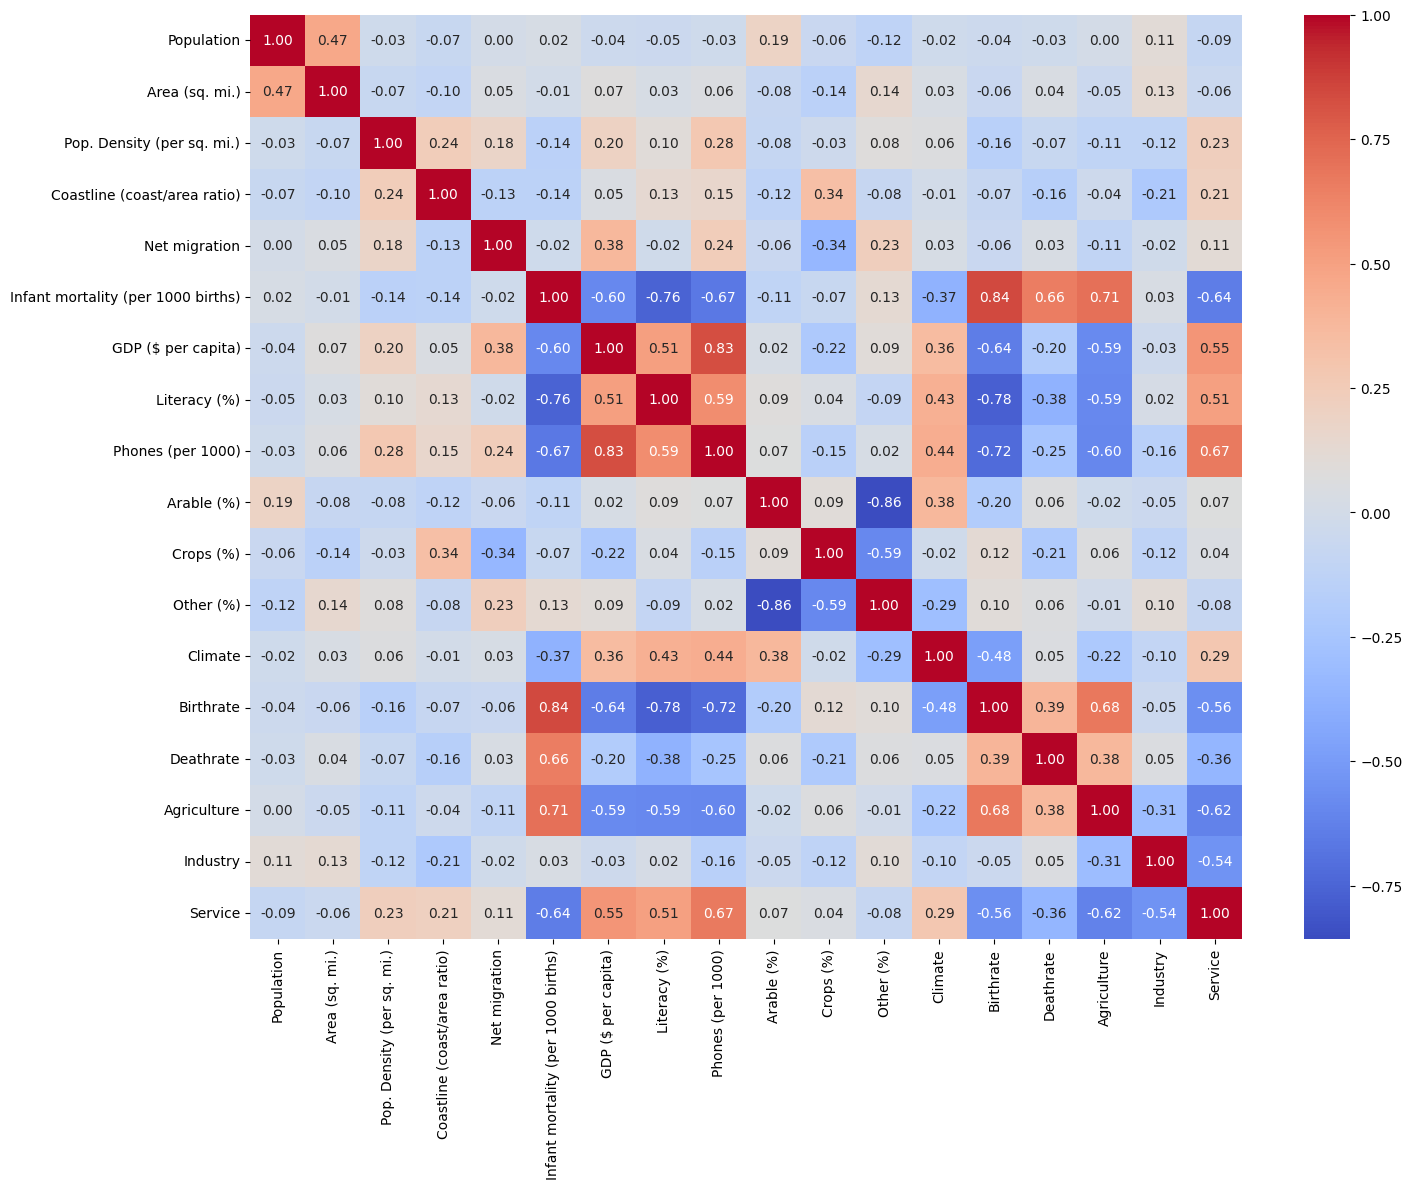

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Dựa vào biểu đồ heatmap ta thấy biến GDP($ per capita) có độ tương quan với 6 biến chia làm 2 mức:


*   Tích cực: 'Phones(per 1000)', 'Birthrate', 'Service' và 'Literacy'
*   Tiêu cực: 'Infant mortality (per 1000 births)', 'Agriculture'



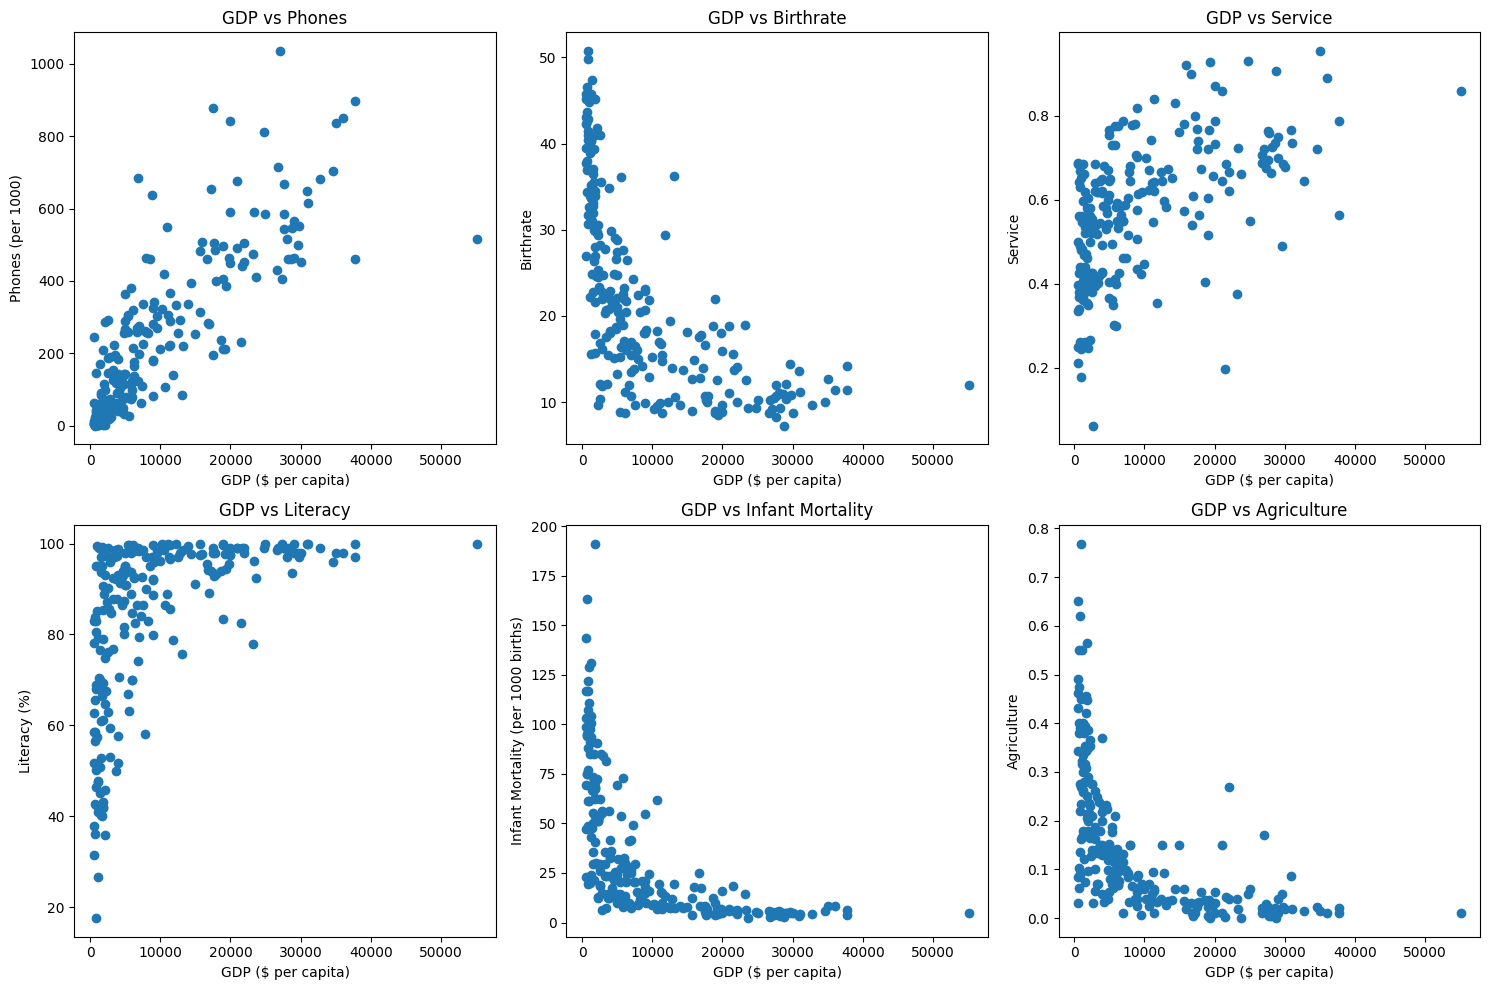

In [ ]:
import matplotlib.pyplot as plt

# Tạo subplot cho mỗi biến
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Vẽ scatter plot cho mỗi biến
axes[0, 0].scatter(df['GDP ($ per capita)'], df['Phones (per 1000)'])
axes[0, 0].set_title('GDP vs Phones')
axes[0, 0].set_xlabel('GDP ($ per capita)')
axes[0, 0].set_ylabel('Phones (per 1000)')

axes[0, 1].scatter(df['GDP ($ per capita)'], df['Birthrate'])
axes[0, 1].set_title('GDP vs Birthrate')
axes[0, 1].set_xlabel('GDP ($ per capita)')
axes[0, 1].set_ylabel('Birthrate')

axes[0, 2].scatter(df['GDP ($ per capita)'], df['Service'])
axes[0, 2].set_title('GDP vs Service')
axes[0, 2].set_xlabel('GDP ($ per capita)')
axes[0, 2].set_ylabel('Service')

axes[1, 0].scatter(df['GDP ($ per capita)'], df['Literacy (%)'])
axes[1, 0].set_title('GDP vs Literacy')
axes[1, 0].set_xlabel('GDP ($ per capita)')
axes[1, 0].set_ylabel('Literacy (%)')

axes[1, 1].scatter(df['GDP ($ per capita)'], df['Infant mortality (per 1000 births)'])
axes[1, 1].set_title('GDP vs Infant Mortality')
axes[1, 1].set_xlabel('GDP ($ per capita)')
axes[1, 1].set_ylabel('Infant Mortality (per 1000 births)')

axes[1, 2].scatter(df['GDP ($ per capita)'], df['Agriculture'])
axes[1, 2].set_title('GDP vs Agriculture')
axes[1, 2].set_xlabel('GDP ($ per capita)')
axes[1, 2].set_ylabel('Agriculture')

plt.tight_layout()
plt.show()


Câu 1: Quốc gia nào có GDP đầu người cao nhất

<ipython-input-19-9c5726fdc45c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp_countries_with_mean, x='GDP ($ per capita)', y='Country', palette='Set3')


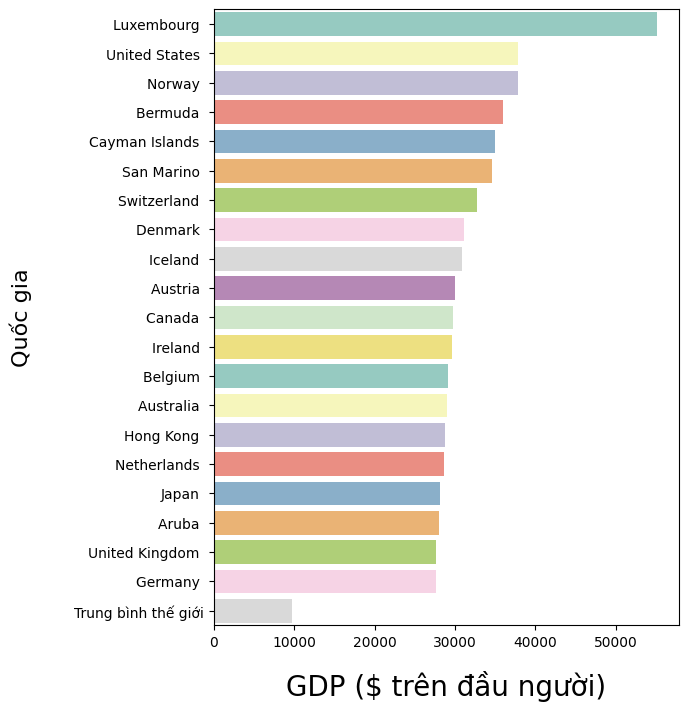

In [ ]:
# Sắp xếp dữ liệu theo GDP trên đầu người
top_gdp_countries = df.sort_values('GDP ($ per capita)', ascending=False).head(20)

# Tính giá trị trung bình GDP trên đầu người cho tất cả các quốc gia
mean_gdp = df['GDP ($ per capita)'].mean()

# Thêm một dòng cho giá trị trung bình thế giới
top_gdp_countries_with_mean = pd.concat([top_gdp_countries, pd.DataFrame({'Country': ['Trung bình thế giới'],
                                                                           'GDP ($ per capita)': [mean_gdp]})],
                                        ignore_index=True)

# Tạo biểu đồ cột ngang
plt.figure(figsize=(6, 8))
sns.barplot(data=top_gdp_countries_with_mean, x='GDP ($ per capita)', y='Country', palette='Set3')

# Đặt nhãn cho các trục
plt.xlabel('GDP ($ trên đầu người)', labelpad=15, fontsize=20)
plt.ylabel('Quốc gia', labelpad=30, fontsize=16)

# Hiển thị biểu đồ
plt.show()

Câu 2: Tính tổng GDP của tất cả các quốc gia trong tệp dữ liệu?

<ipython-input-20-d95049f78aab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Total_GDP ($)', data=gdps, ax=axes[0], palette='Set3')


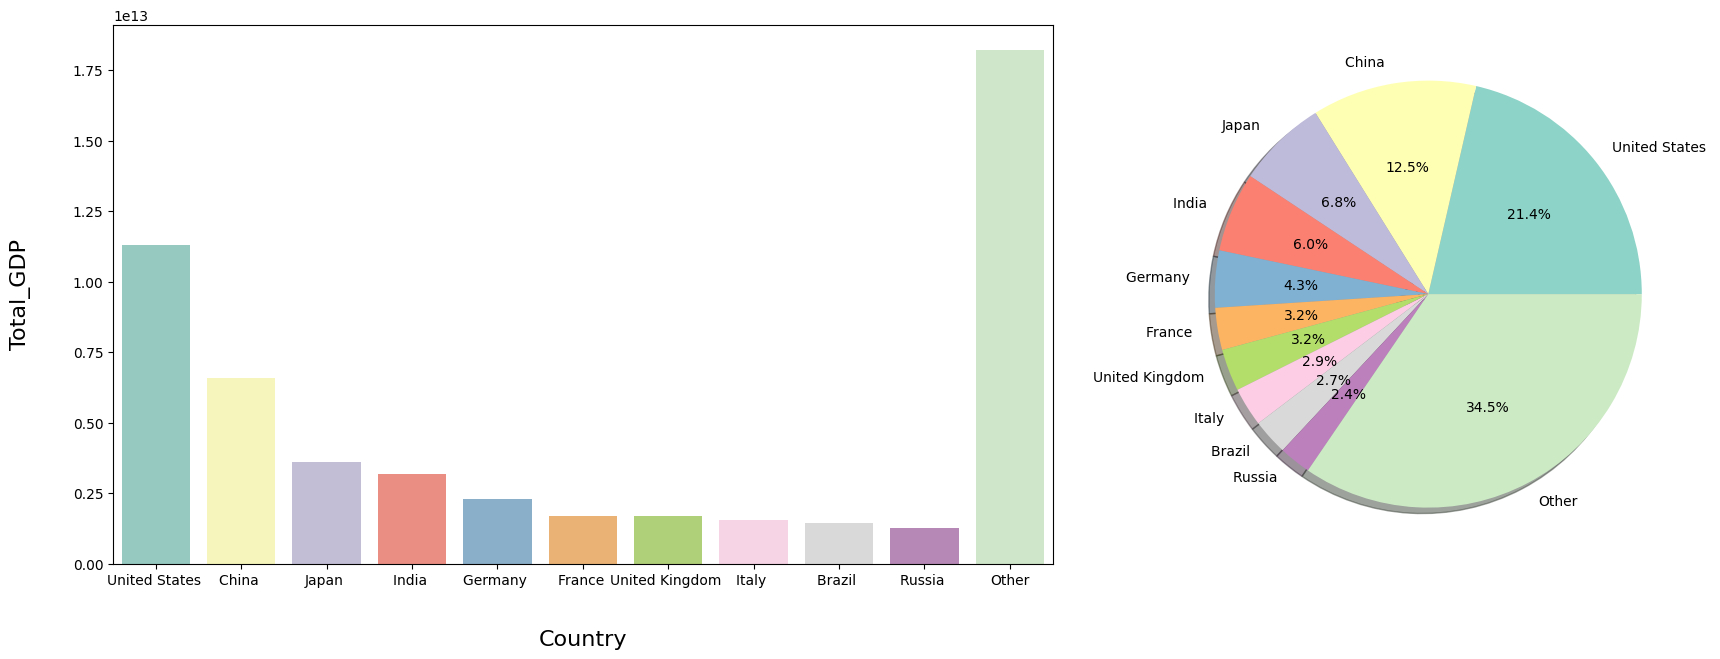

In [ ]:
df['Total_GDP ($)'] = df['GDP ($ per capita)'] * df['Population']
top_gdp_countries = df.sort_values('Total_GDP ($)', ascending=False).head(10)
other = pd.DataFrame({'Country': ['Other'], 'Total_GDP ($)': [df['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country', 'Total_GDP ($)']], other], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.barplot(x='Country', y='Total_GDP ($)', data=gdps, ax=axes[0], palette='Set3')
axes[0].set_xlabel('Country', labelpad=30, fontsize=16)
axes[0].set_ylabel('Total_GDP', labelpad=30, fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].axis('equal')
plt.show()


  Câu 3: Quốc gia nào có ngành nông nghiệp cao nhất?

<ipython-input-21-194a11f523d0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


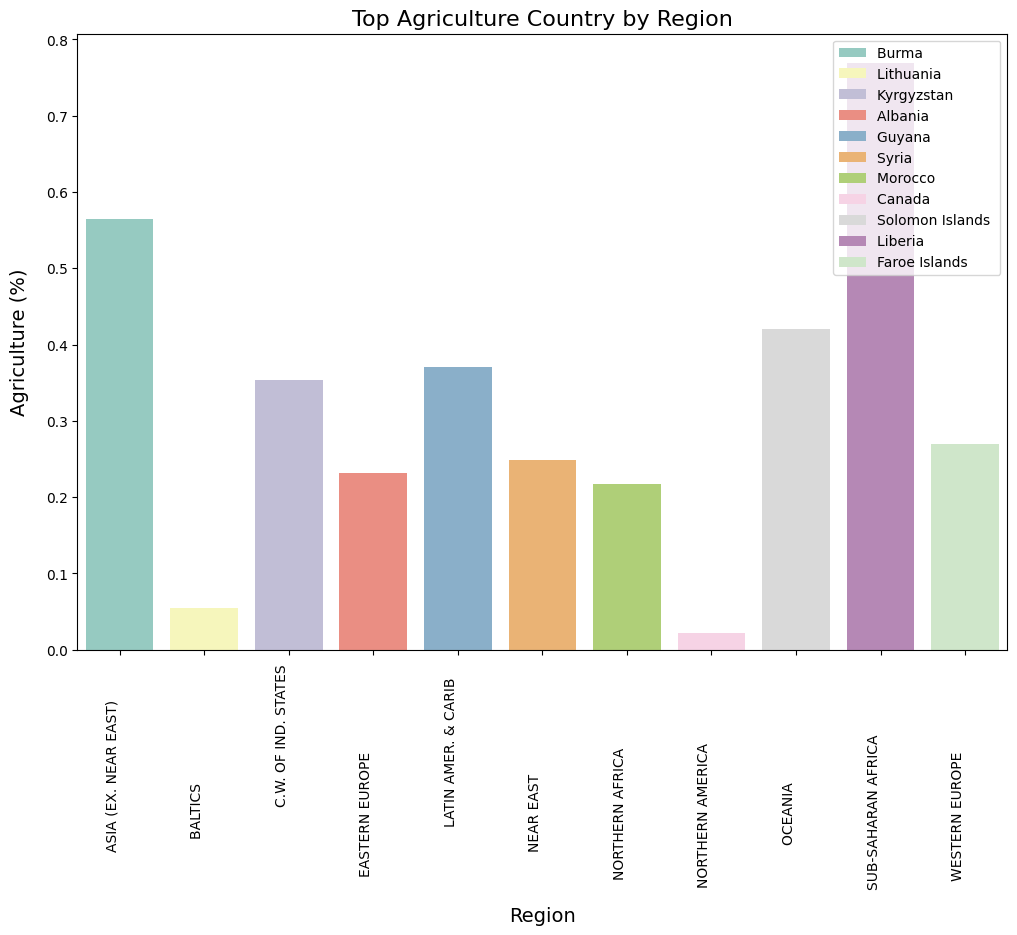

In [ ]:
# Tạo DataFrame chỉ với các quốc gia có ngành nông nghiệp cao nhất theo từng vùng lục địa
top_agriculture_by_continent = df.loc[df.groupby('Region')['Agriculture'].idxmax()]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Region', y='Agriculture', hue='Country', data=top_agriculture_by_continent, palette='Set3')
plt.xlabel('Region', labelpad=12, fontsize=14)
plt.ylabel('Agriculture (%)', labelpad=12, fontsize=14)
plt.title('Top Agriculture Country by Region', fontsize=16)
plt.xticks(rotation=90, ha='right')

# Thu nhỏ tên vùng trên trục x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.legend(loc='upper right')
plt.show()

Câu 4: Quốc gia nào có tỷ lệ tử vong sơ sinh (Infant mortality) thấp nhất? Và cao nhất?

<ipython-input-22-26ba2a390329>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Region', y='Infant mortality (per 1000 births)', data=highest_infant_mortality_countries, palette='viridis')


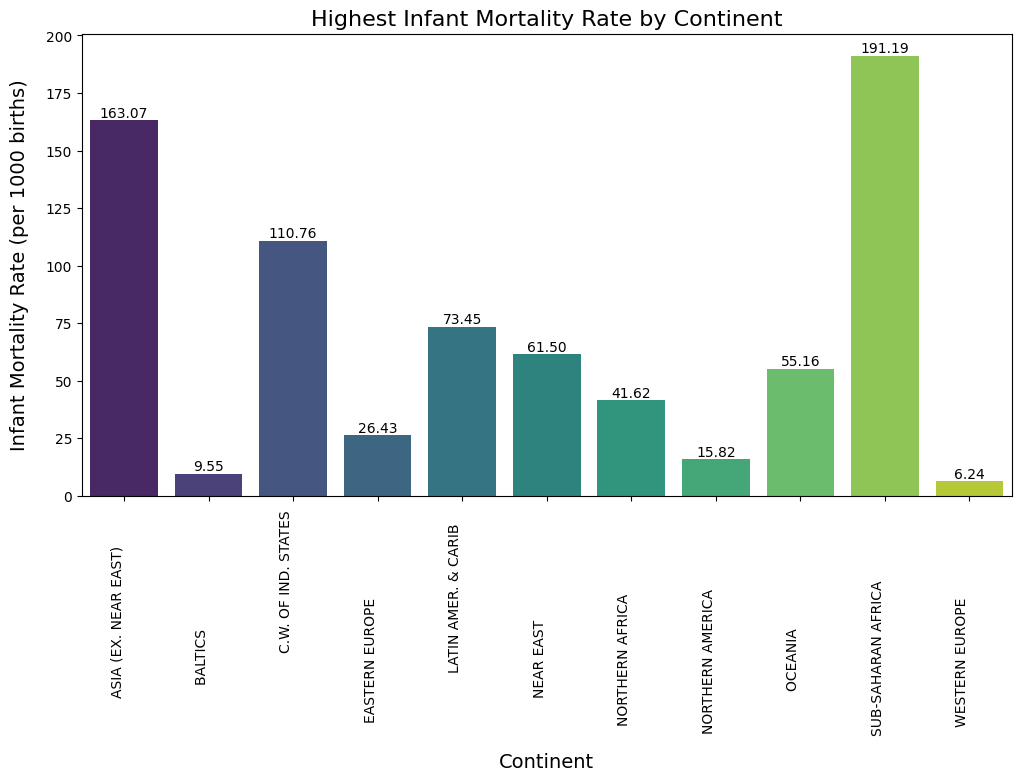

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tìm quốc gia có tỷ lệ tử vong sơ sinh cao nhất từ mỗi châu lục
highest_infant_mortality_countries = df.loc[df.groupby('Region')['Infant mortality (per 1000 births)'].idxmax()]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Region', y='Infant mortality (per 1000 births)', data=highest_infant_mortality_countries, palette='viridis')
plt.xlabel('Continent', fontsize=14, labelpad=12)
plt.ylabel('Infant Mortality Rate (per 1000 births)', fontsize=14, labelpad=12)
plt.title('Highest Infant Mortality Rate by Continent', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=10)

# Đặt tên cho từng cột
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Câu 5: Có bao nhiêu quốc gia có mật độ dân số trên 500 người/km²?

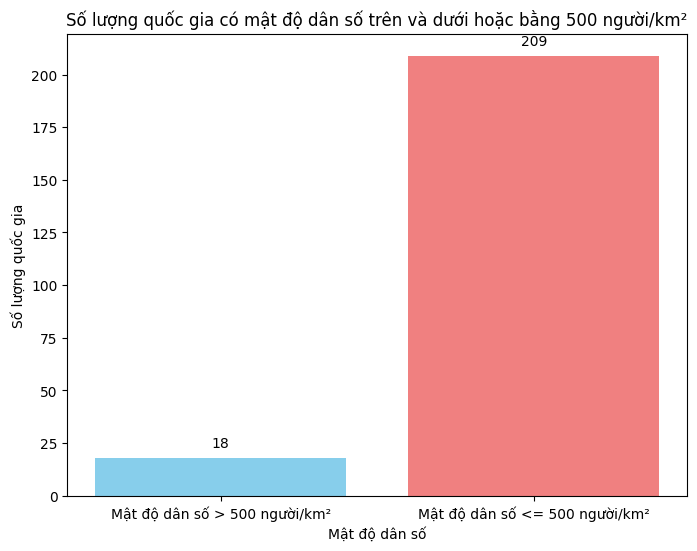

In [ ]:
import matplotlib.pyplot as plt
# Chuyển đổi đơn vị diện tích sang km vuông
df["Area (sq. km.)"] = df["Area (sq. mi.)"] * 2.58998811

# Tính mật độ dân số
df["Pop. Density (per sq. km.)"] = df["Population"] / df["Area (sq. km.)"]

# Đếm số lượng quốc gia có mật độ dân số trên 500 người/km²
num_countries_above_500_density = (df['Pop. Density (per sq. mi.)'] > 500).sum()
num_countries_below_or_equal_500_density = len(df) - num_countries_above_500_density

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(['Mật độ dân số > 500 người/km²', 'Mật độ dân số <= 500 người/km²'], [num_countries_above_500_density, num_countries_below_or_equal_500_density], color=['skyblue', 'lightcoral'])
plt.xlabel('Mật độ dân số')
plt.ylabel('Số lượng quốc gia')
plt.title('Số lượng quốc gia có mật độ dân số trên và dưới hoặc bằng 500 người/km²')
plt.text(0, num_countries_above_500_density + 5, str(num_countries_above_500_density), ha='center', color='black')
plt.text(1, num_countries_below_or_equal_500_density + 5, str(num_countries_below_or_equal_500_density), ha='center', color='black')
plt.show()


Câu 6: Tính tỷ lệ tử vong sơ sinh trung bình của các quốc gia ở Châu Mỹ (Americas)?

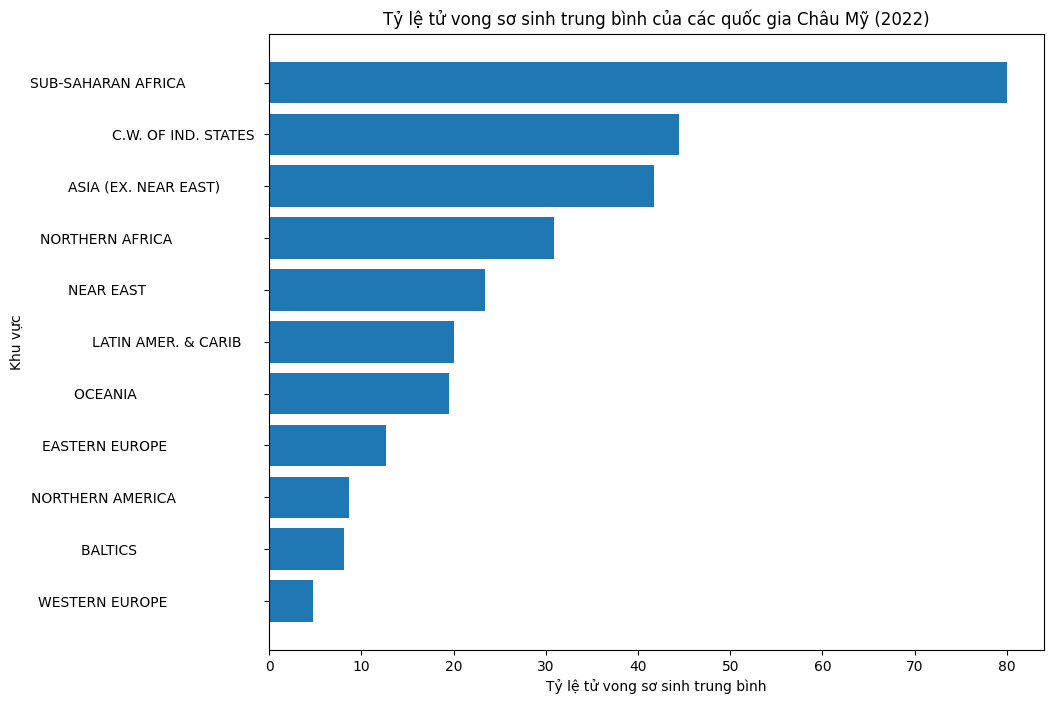

In [ ]:
import matplotlib.pyplot as plt

# Lọc dữ liệu cho khu vực Châu Đại Dương
data = df.dropna(subset=["Region", "Infant mortality (per 1000 births)"])

region_data = df.groupby("Region")
region_data = region_data["Infant mortality (per 1000 births)"].mean()


region_data = region_data.sort_values()

plt.figure(figsize=(10,8))
plt.barh(region_data.index, region_data)
plt.xlabel("Tỷ lệ tử vong sơ sinh trung bình")
plt.ylabel("Khu vực")
plt.title("Tỷ lệ tử vong sơ sinh trung bình của các quốc gia Châu Mỹ (2022)")
plt.show()



Câu 7: Tỷ lệ diện tích bờ biển so với diện tích tổng của Châu Phi là bao nhiêu?

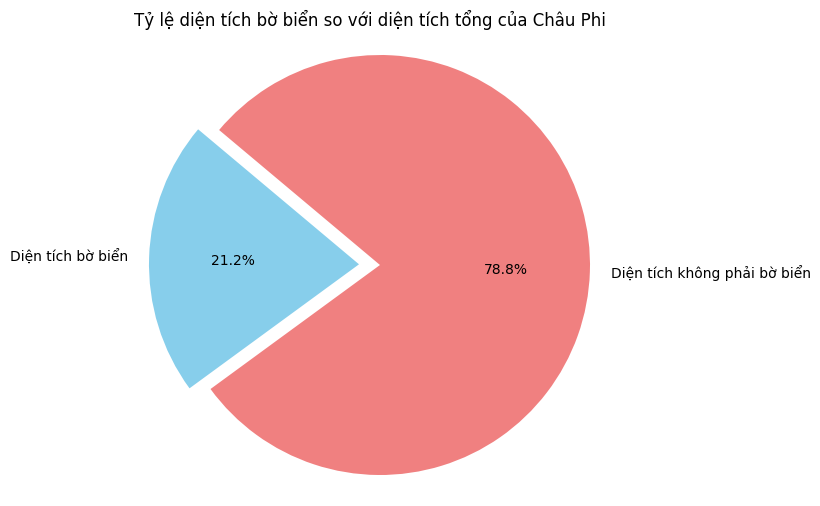

In [ ]:
# Loại bỏ các dòng có giá trị bỏ trống trong cột 'Coastline (coast/area ratio)'
data_cleaned = data.dropna(subset=['Coastline (coast/area ratio)'])

# Tính tỷ lệ trung bình của diện tích bờ biển so với diện tích tổng của Châu Phi
mean_coastline_ratio = data_cleaned['Coastline (coast/area ratio)'].mean()

# Tạo biểu đồ tròn
labels = ['Diện tích bờ biển', 'Diện tích không phải bờ biển']
sizes = [mean_coastline_ratio, 100 - mean_coastline_ratio]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Tỷ lệ diện tích bờ biển so với diện tích tổng của Châu Phi")
plt.show()

Câu 8: Top 10 quốc gia có tỷ lệ ngành công nghiệp cao nhất trong khu vực Châu Á

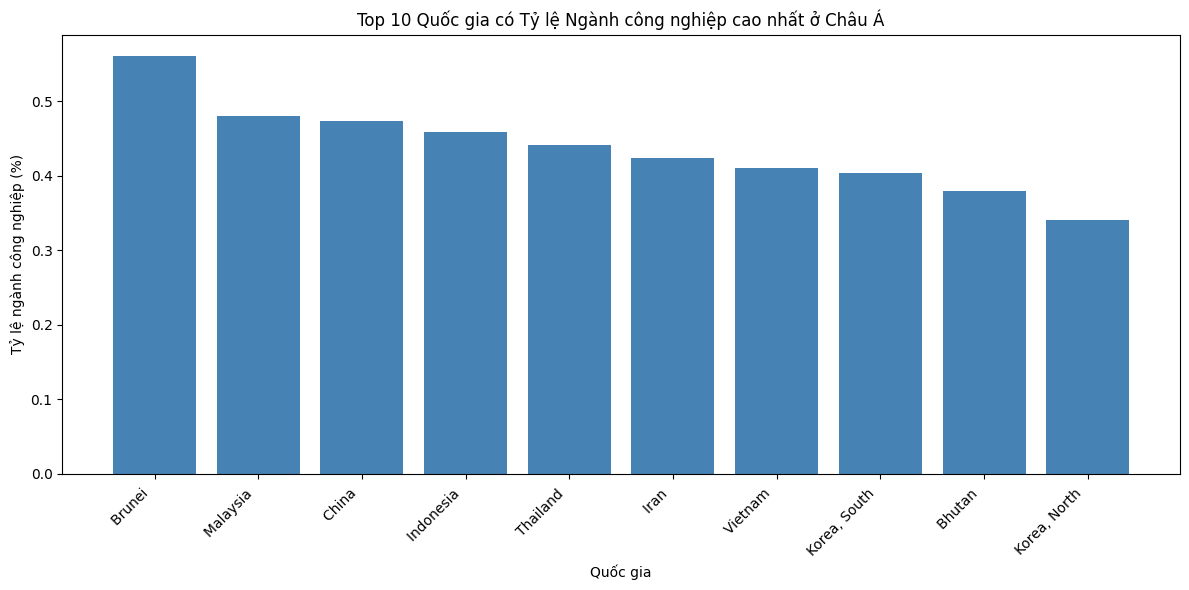

In [ ]:
# Lọc dataframe để chỉ bao gồm các quốc gia thuộc Châu Á
asia_df = df[df["Region"].str.strip() == "ASIA (EX. NEAR EAST)"]

# Sắp xếp dataframe theo cột "Industry" theo thứ tự giảm dần
top_10_industrial_countries = asia_df.nlargest(10, "Industry")

# Lấy tên quốc gia và giá trị ngành công nghiệp
countries = top_10_industrial_countries["Country"]
industry_values = top_10_industrial_countries["Industry"]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(countries, industry_values, color="steelblue")
plt.xlabel("Quốc gia")
plt.ylabel("Tỷ lệ ngành công nghiệp (%)")
plt.title("Top 10 Quốc gia có Tỷ lệ Ngành công nghiệp cao nhất ở Châu Á")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Câu 9:Tính tổng GDP  của các quốc gia ở Châu Phi và 10 quốc gia nào có lượng GDP cao nhất (Africa)?

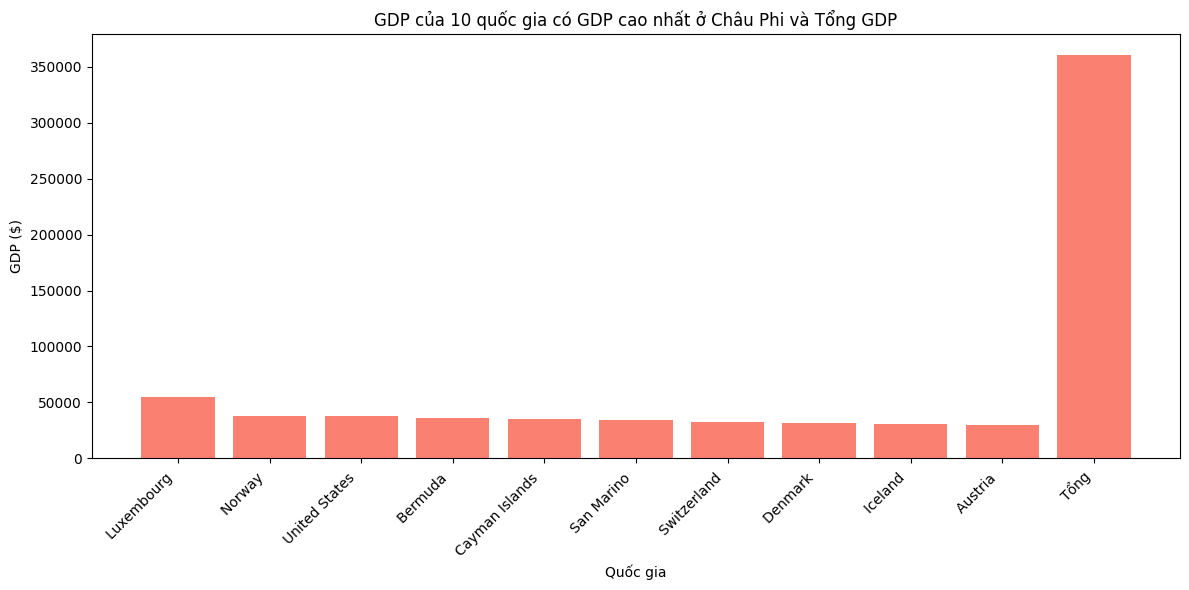

In [ ]:
import matplotlib.pyplot as plt

# Chỉ lấy 10 quốc gia có GDP cao nhất
top_10_countries = df.nlargest(10, 'GDP ($ per capita)')

# Lấy thông tin quốc gia và GDP của top 10 quốc gia
countries = top_10_countries['Country']
gdp_values = top_10_countries['GDP ($ per capita)']

# Tính tổng GDP của top 10 quốc gia
total_gdp = gdp_values.sum()

# Thêm giá trị tổng vào danh sách GDP và tên quốc gia
countries = countries.tolist()
gdp_values = gdp_values.tolist()
countries.append('Tổng')
gdp_values.append(total_gdp)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(countries, gdp_values, color='salmon')
plt.xlabel('Quốc gia')
plt.ylabel('GDP ($)')
plt.title('GDP của 10 quốc gia có GDP cao nhất ở Châu Phi và Tổng GDP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Câu 10: Các ngành chiếm tỉ lệ như thế nào trong top 10 các nước có tổng GDP cao nhất

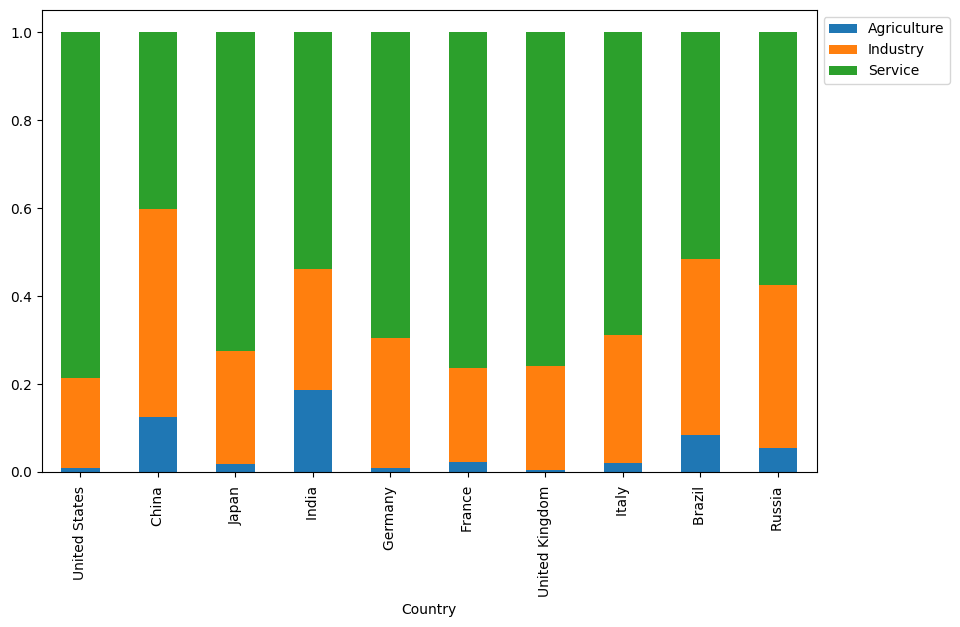

In [ ]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


Câu 11: Tỉ lệ diện tích đất canh tác và các loại cây trồng (Arable (%) và Crops (%)) so với diện tích đất không được sử dụng cho canh tác (Other (%)) của các quốc gia có tổng GDP cao nhất có sự phân bố như thế nào?

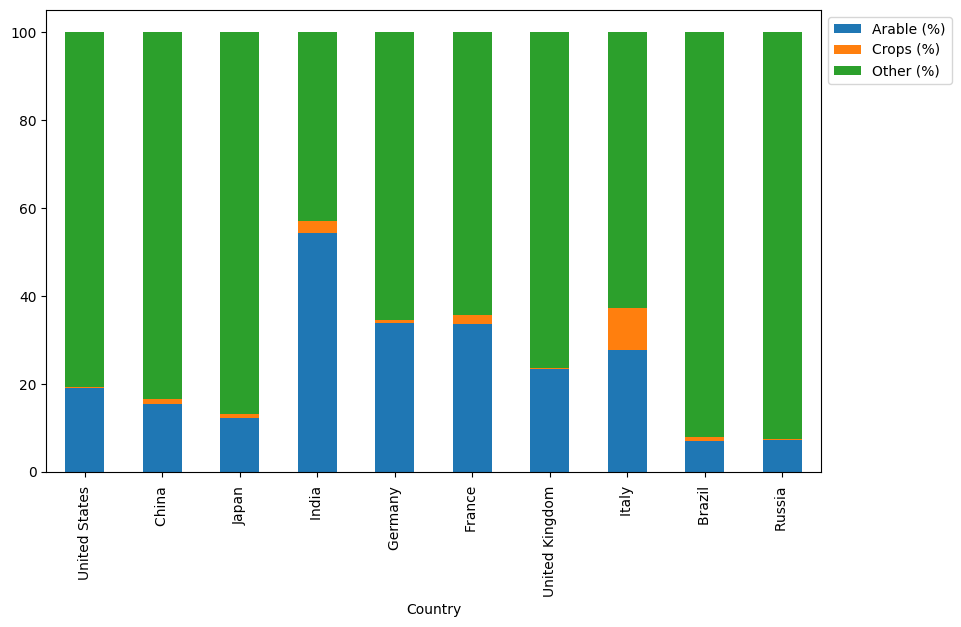

In [ ]:
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Câu 12: So sánh tỷ lệ sinh (Birthrate) và tỷ lệ tử (Deathrate) của mỗi quốc gia trong top 10 quốc gia có tổng GDP cao nhất.

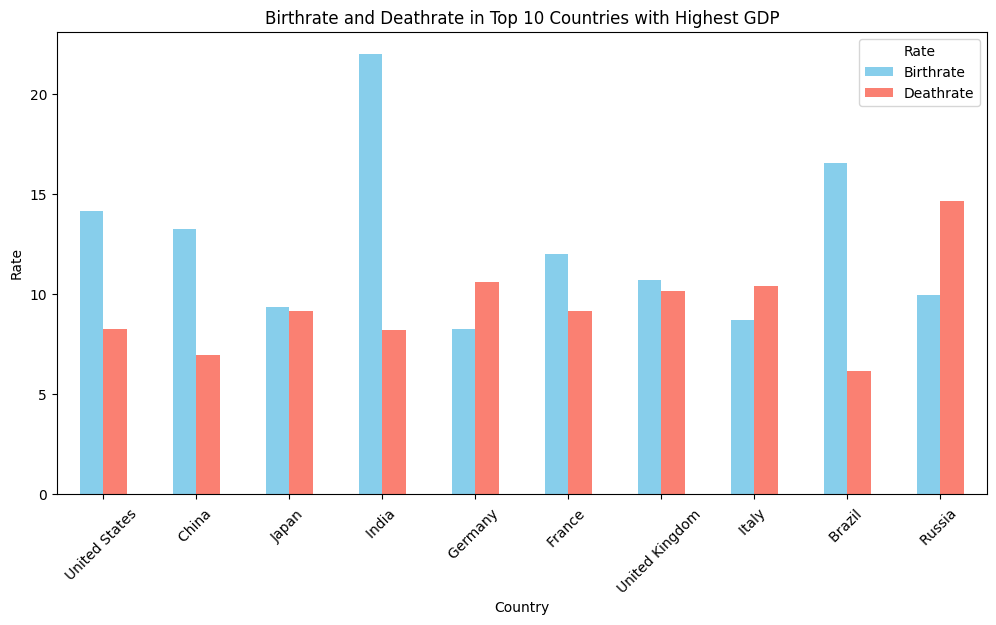

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu của top 10 quốc gia có tổng GDP cao nhất
top_gdp_countries = df.sort_values('Total_GDP ($)', ascending=False).head(10)

# Chọn cột 'Country' và các cột 'Birthrate', 'Deathrate'
plot_data = top_gdp_countries[['Country', 'Birthrate', 'Deathrate']]

# Đặt cột 'Country' làm index
plot_data = plot_data.set_index('Country')

# Vẽ biểu đồ cột
ax = plot_data.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
ax.set_ylabel('Rate')
ax.set_xlabel('Country')
plt.title('Birthrate and Deathrate in Top 10 Countries with Highest GDP')
plt.xticks(rotation=45)
plt.legend(title='Rate', loc='upper right')
plt.show()


Câu 13: Quốc gia nào có tỷ lệ biết chữ cao nhất trong khu vực Trung Đông (Near East)?

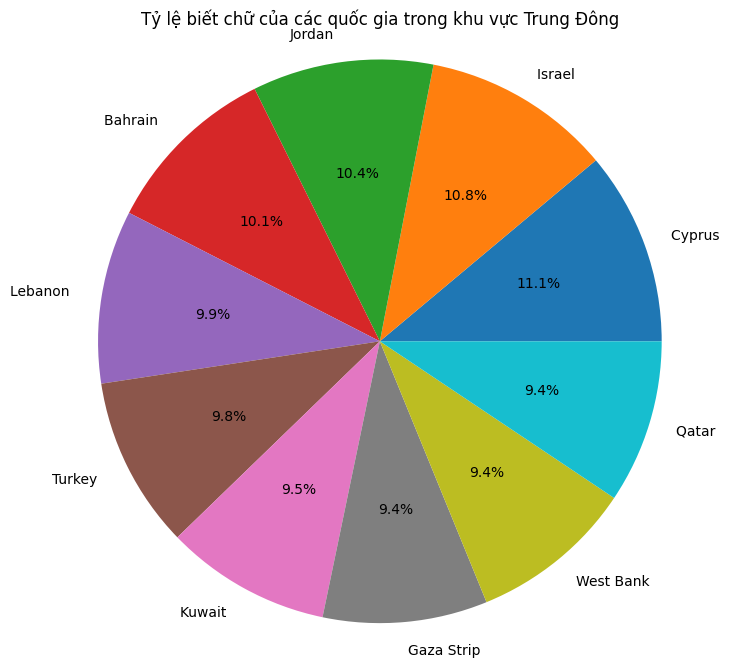

In [ ]:
# Lọc dataframe để chỉ bao gồm các quốc gia thuộc khu vực Trung Đông (Near East)
near_east_df = df[df["Region"].str.strip() == "NEAR EAST"]

# Sắp xếp dataframe theo tỷ lệ biết chữ giảm dần
sorted_df = near_east_df.sort_values(by="Literacy (%)", ascending=False)

# Lấy tên quốc gia và tỷ lệ biết chữ của 10 quốc gia đầu tiên
countries = sorted_df["Country"].head(10)
literacy_rates = sorted_df["Literacy (%)"].head(10)

# Vẽ biểu đồ tỷ lệ tròn
plt.figure(figsize=(8, 8))
plt.pie(literacy_rates, labels=countries, autopct="%1.1f%%")
plt.title("Tỷ lệ biết chữ của các quốc gia trong khu vực Trung Đông")
plt.axis("equal")
plt.show()

Câu 14: Quốc gia có tỷ lệ ngành nông nghiệp thấp nhất trong khu vực Châu Á (Asia)?

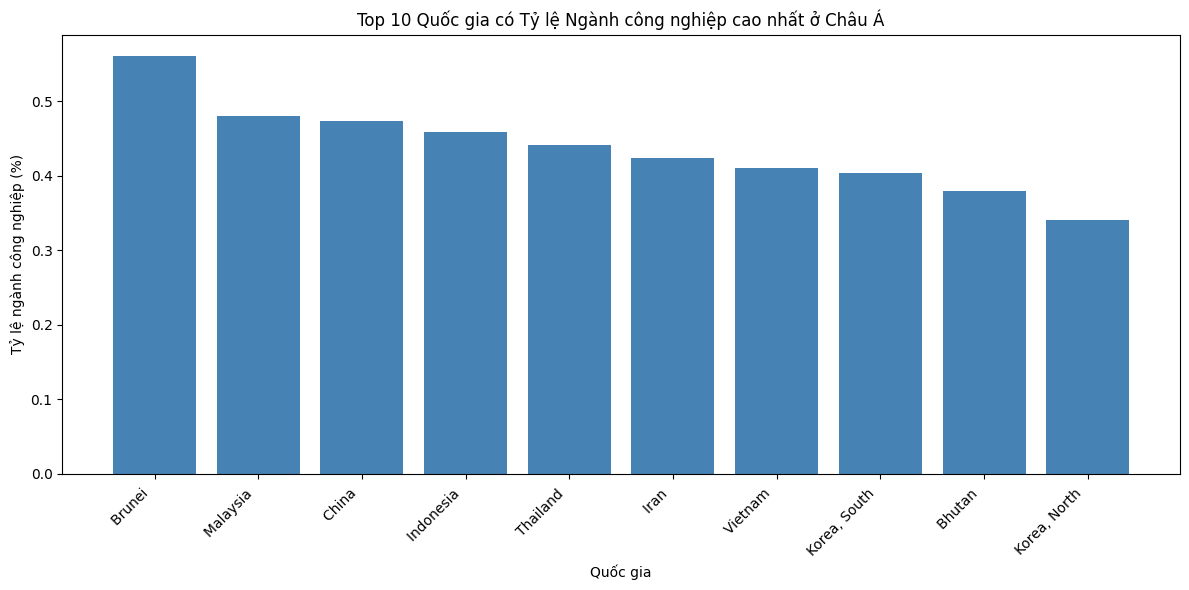

In [ ]:
# Lọc dataframe để chỉ bao gồm các quốc gia thuộc Châu Á
asia_df = df[df["Region"].str.strip() == "ASIA (EX. NEAR EAST)"]

# Sắp xếp dataframe theo cột "Industry" theo thứ tự giảm dần
top_10_industrial_countries = asia_df.nlargest(10, "Industry")

# Lấy tên quốc gia và giá trị ngành công nghiệp
countries = top_10_industrial_countries["Country"]
industry_values = top_10_industrial_countries["Industry"]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(countries, industry_values, color="steelblue")
plt.xlabel("Quốc gia")
plt.ylabel("Tỷ lệ ngành công nghiệp (%)")
plt.title("Top 10 Quốc gia có Tỷ lệ Ngành công nghiệp cao nhất ở Châu Á")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Câu 15: Quốc gia nào có tỷ lệ đất canh tác cao nhất trong khu vực Châu Phi

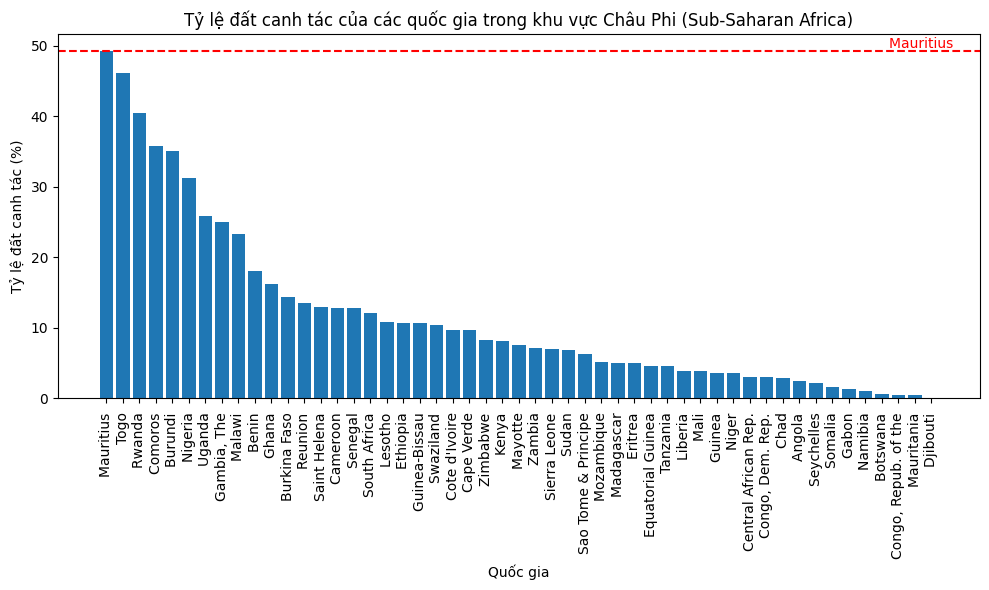

Quốc gia có tỷ lệ đất canh tác cao nhất trong khu vực Châu Phi (Sub-Saharan Africa) là: Mauritius 
Tỷ lệ đất canh tác: 49.26%


In [ ]:
# Lọc dataframe để chỉ bao gồm các quốc gia thuộc khu vực Châu Phi (Sub-Saharan Africa)
africa_df = df[df["Region"].str.strip() == "SUB-SAHARAN AFRICA"]

# Sắp xếp dataframe theo tỷ lệ đất canh tác giảm dần
sorted_df = africa_df.sort_values(by="Arable (%)", ascending=False)

# Lấy tên quốc gia và tỷ lệ đất canh tác của quốc gia có tỷ lệ cao nhất
country_with_highest_arable_land = sorted_df.iloc[0]["Country"]
highest_arable_land_percentage = sorted_df.iloc[0]["Arable (%)"]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(sorted_df["Country"], sorted_df["Arable (%)"])
plt.xticks(rotation=90)
plt.xlabel("Quốc gia")
plt.ylabel("Tỷ lệ đất canh tác (%)")
plt.title("Tỷ lệ đất canh tác của các quốc gia trong khu vực Châu Phi (Sub-Saharan Africa)")

# In quốc gia có tỷ lệ đất canh tác cao nhất
plt.axhline(highest_arable_land_percentage, color='r', linestyle='--')
plt.text(len(sorted_df) - 1.5, highest_arable_land_percentage + 0.5, country_with_highest_arable_land, ha='center', color='r')

plt.tight_layout()
plt.show()

# In kết quả
print("Quốc gia có tỷ lệ đất canh tác cao nhất trong khu vực Châu Phi (Sub-Saharan Africa) là:", country_with_highest_arable_land)
print("Tỷ lệ đất canh tác: {}%".format(highest_arable_land_percentage))

Câu 16:  Các quốc gia có GDP trên đầu người thấp nhất của các khu vực

<ipython-input-62-dab15ba7f077>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


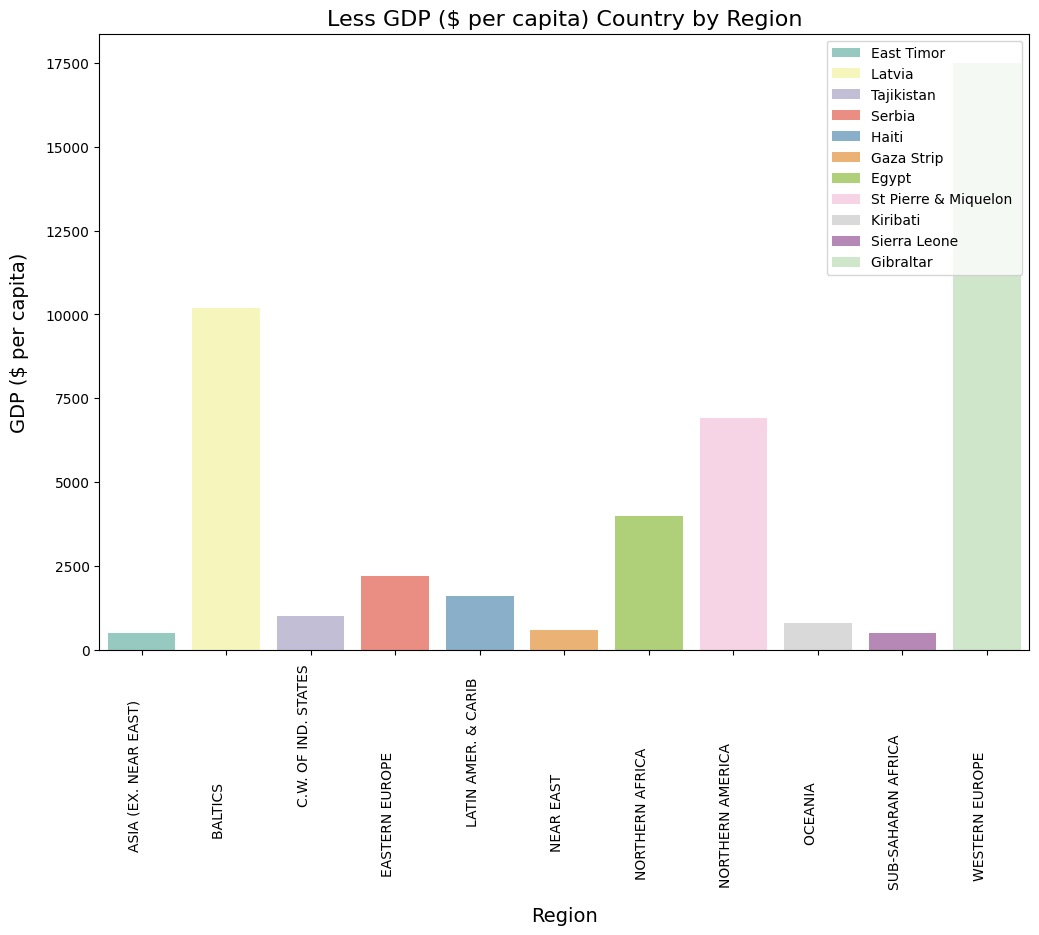

In [ ]:
#Tạo DataFrame chỉ với các quốc gia có ngành GDP đầu người thấp nhất theo từng vùng lục địa
top_gdp_per_capita_by_continent = df.loc[df.groupby('Region')['GDP ($ per capita)'].idxmin()]

#Vẽ biểu đồ
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Region', y='GDP ($ per capita)', hue='Country', data=top_gdp_per_capita_by_continent, palette='Set3')
plt.xlabel('Region', labelpad=12, fontsize=14)
plt.ylabel('GDP ($ per capita)', labelpad=12, fontsize=14)
plt.title('Less GDP ($ per capita) Country by Region', fontsize=16)
plt.xticks(rotation=90, ha='right')

#Thu nhỏ tên vùng trên trục x
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

plt.legend(loc='upper right')
plt.show()